## Introducción

#### El hundimiento del RMS Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural. Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

![Picture title](Titanic.jpg)

#### Objetivo: Predecir que pasajero son los que sobreviviran con ayuda de "Machine Learning"

## Importación de  las herramientas necesarias

In [ ]:
import pandas as pd #Libreria para manejo de datos
import numpy as np #Liberia de funciones matematicas
from sklearn.linear_model import LogisticRegression #Modelo de Machine Learning
from sklearn import metrics #Necesario para medir la eficiencia de nuestro modelo
import matplotlib.pyplot as plt #Libreria para realizar graficos 1
import seaborn as sns #Libreria para realizar graficos 2

In [ ]:
#Datasets
titanic_train=pd.read_csv('titanic_train.csv')
titanic_test=pd.read_csv('titanic_test.csv')
resultados=pd.read_csv('titanic_control.csv')

## Preprocesamiento de datos

In [ ]:
titanic_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
215,1107,1,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S
265,1157,3,"Lyntakoff, Mr. Stanko",male,NaN,0,0,349235,7.8958,NaN,S
324,1216,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S
166,1058,1,"Brandeis, Mr. Emil",male,48.0,0,0,PC 17591,50.4958,B10,C
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
63,955,3,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q
219,1111,3,"Thomson, Mr. Alexander Morrison",male,NaN,0,0,32302,8.0500,NaN,S
51,943,2,"Pulbaum, Mr. Franz",male,27.0,0,0,SC/PARIS 2168,15.0333,NaN,C
269,1161,3,"Pokrnic, Mr. Mate",male,17.0,0,0,315095,8.6625,NaN,S


### Comprobación de datos faltantes en el dataset

In [ ]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#Se remplaza los datos faltantes por los valores promedio
titanic_train.Age=titanic_train.Age.fillna(titanic_train.Age.mean())
titanic_test.Age=titanic_test.Age.fillna(titanic_train.Age.mean())
titanic_test.Fare=titanic_test.Fare.fillna(titanic_train.Fare.mean())

### Convertir variables categóricas a tipo dummy

In [ ]:
#Nuestro modelo solo puede interactuar con variables numericas
#Por eso convertimos las variables categoricas a tipo dummy
#Esto lo aplicamos a la variable sexo,debido que a que sera muy importante en el entrenamiento
titanic_train=pd.get_dummies(titanic_train, columns = ["Sex"],drop_first=True)
titanic_test=pd.get_dummies(titanic_test, columns = ["Sex"],drop_first=True)
titanic_test.sample(10)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
112,1004,1,"Evans, Miss. Edith Corse",36.000000,0,0,PC 17531,31.6792,A29,C,0
202,1094,1,"Astor, Col. John Jacob",47.000000,1,0,PC 17757,227.5250,C62 C64,C,1
372,1264,1,"Ismay, Mr. Joseph Bruce",49.000000,0,0,112058,0.0000,B52 B54 B56,S,1
41,933,1,"Franklin, Mr. Thomas Parham",29.699118,0,0,113778,26.5500,D34,S,1
160,1052,3,"Smyth, Miss. Julia",29.699118,0,0,335432,7.7333,NaN,Q,0
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",20.000000,0,0,SC/PARIS 2166,13.8625,D38,C,1
79,971,3,"Doyle, Miss. Elizabeth",24.000000,0,0,368702,7.7500,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",26.000000,1,1,248738,29.0000,NaN,S,1
307,1199,3,"Aks, Master. Philip Frank",0.830000,0,1,392091,9.3500,NaN,S,1
316,1208,1,"Spencer, Mr. William Augustus",57.000000,1,0,PC 17569,146.5208,B78,C,1


## Entrenamiento de modelo de regresión logística

In [ ]:
columnas=['Pclass','Age','Fare','Sex_male','Parch','SibSp']
x_train=titanic_train[columnas]
y_train=titanic_train['Survived']
x_test=titanic_test[columnas]
y_test=resultados['Survived']

In [ ]:
regresion_logistica=LogisticRegression(max_iter=len(x_train)).fit(x_train,y_train)
#Entrenamiento del modelo

In [ ]:
y_pred=regresion_logistica.predict(x_test)
#Predecir el destino de los pasajeros

## Verificación de la eficiencia del modelo ya entrenado

### Método Gráfico: Matriz de confusión

#### Con esta matriz podemos medir cual es el índice de acierto del modelo
![Picture title](image-20210905-112155.png)

In [ ]:
matriz_confucion=metrics.confusion_matrix(y_test,y_pred)

array([[253,  13],
       [  9, 143]])

Text(0.5, 257.44, 'Etiqueta de prediccion')

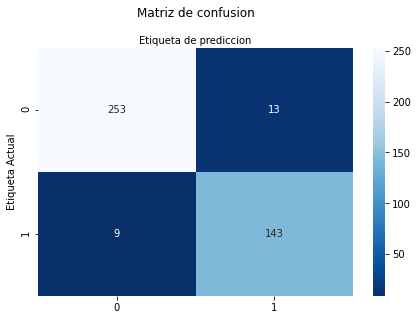

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matriz_confucion), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

### Método analítico: Precisión de modelo

In [ ]:
print('Exactitud del',round((metrics.accuracy_score(y_test,y_pred)*100),2),'%')

Exactitud del 94.74 %


## Conclusión

#### Después del entrenamiento podemos ver que obtenemos una precisión de aproximadamente 95% de efectividad con nuestro modelo.
#### La regresión logística resulto muy adecuada para la clasificación binaria para determinar la probabilidad de supervivencia de cada individuo a bordo del titánic.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e10bc24-4cc7-4253-93e3-870f1fc825d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>